In [1]:
import pandas as pd
import warnings
import rpy2
warnings.filterwarnings('ignore')

In [2]:
%load_ext rpy2.ipython

In [3]:
import plotly.graph_objects as go

def plot_(title, *series):
    # Crear una figura
    fig = go.Figure()

    # Agregar cada serie de datos al gráfico
    for x_variable, y_variable, label in series:
        fig.add_trace(go.Scatter(
            x=x_variable,
            y=y_variable,
            mode='lines',
            name=label,
            line=dict(width=2)
        ))

    # Actualizar el tipo de eje x a 'date'
    fig.update_xaxes(type='date')

    # Ajustar el título para que esté centrado
    fig.update_layout(title_text=title, title_x=0.5)

    # Personalizar el selector de rango de fechas
    fig.update_layout(
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label="1d",
                         step="day",
                         stepmode="backward"),
                    dict(count=7,
                         label="1w",
                         step="day",
                         stepmode="backward"),
                    dict(count=1,
                         label="1m",
                         step="month",
                         stepmode="backward"),
                    dict(count=3,
                         label="3m",
                         step="month",
                         stepmode="backward"),
                    dict(count=6,
                         label="6m",
                         step="month",
                         stepmode="backward"),
                    dict(count=1,
                         label="1y",
                         step="year",
                         stepmode="backward"),
                    dict(count=2,
                         label="2y",
                         step="year",
                         stepmode="backward"),
                    dict(count=3,
                         label="3y",
                         step="year",
                         stepmode="backward"),
                    dict(count=5,
                         label="5y",
                         step="year",
                         stepmode="backward"),
                    dict(count=10,
                         label="10y",
                         step="year",
                         stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(
                visible=True
            ),
            type="date"
        ),
        yaxis=dict(
            autorange=True,
            type="linear"
        )
    )

    # Personalizar los títulos de los ejes
    fig.update_layout(
        xaxis_title="Tiempo",
        yaxis_title="Indice de producción"
    )

    # Personalizar la leyenda
    fig.update_layout(
        legend=dict(
            orientation="v",
            yanchor="top",
            y=1,
            xanchor="left",
            x=-.35
        )
    )

    # Mostrar el gráfico
    fig.show()

# 0 Importación de datos

In [4]:
import yfinance as yf

ticker_name = 'BC'

data = yf.download(ticker_name, start='2000-01-01', end='2010-01-01')
print(data.shape)
data.head()

[*********************100%%**********************]  1 of 1 completed

(2515, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,22.0000,22.09375,21.6875,21.9375,15.344913,286700
2000-01-04,21.9375,22.12500,20.8750,20.9375,14.645432,338700
2000-01-05,20.6875,21.62500,20.6875,21.0625,14.732867,214000
2000-01-06,21.1250,21.31250,20.8750,21.2500,14.864015,232700
2000-01-07,21.2500,21.62500,20.9375,21.3750,14.951452,207800


In [5]:
df = pd.DataFrame()
df["Date"] = pd.to_datetime(data.index)
df["Close"] = data["Close"].values
display(df.head(10))
display(df.shape)

df_completo = df.copy()
df_completo.set_index('Date', inplace=True)
df_completo = df_completo.resample('1D').mean().ffill()
display(df_completo.head(10))
df_completo.shape

,Date,Close
0,2000-01-03,21.9375
1,2000-01-04,20.9375
2,2000-01-05,21.0625
3,2000-01-06,21.2500
4,2000-01-07,21.3750
5,2000-01-10,21.4375
6,2000-01-11,21.4375
7,2000-01-12,21.3750
8,2000-01-13,21.5625
9,2000-01-14,21.3125


(2515, 2)

,Close
Date,
2000-01-03,21.9375
2000-01-04,20.9375
2000-01-05,21.0625
2000-01-06,21.2500
2000-01-07,21.3750
2000-01-08,21.3750
2000-01-09,21.3750
2000-01-10,21.4375
2000-01-11,21.4375


(3651, 1)

In [6]:
%R -i df

Además: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages


In [7]:
%%R
library(tidyverse)
library(fpp3)
library(lubridate)


df=df %>% 
  mutate(Date=ymd(Date)) %>% 
  as_tsibble(index = Date) %>%
  fill_gaps(.full=TRUE) %>%
  fill('Close', .direction = 'down')
head(df, 10)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
# A tsibble: 10 x 2 [1D]
   Date       Close
   <date>     <dbl>
 1 2000-01-03  21.9
 2 2000-01-04  20.9
 3 2000-01-05  21.1
 4 2000-01-06  21.2
 5 2000-01-07  21.4
 6 2000-01-08  21.4
 7 2000-01-09  21.4
 8 2000-01-10  21.4
 9 2000-01-11  21.4
10 2000-01-12  21.4


── Attaching packages ────────────────────────────────────────────── fpp3 0.5 ──
✔ tsibble     1.1.4     ✔ fable       0.3.3
✔ tsibbledata 0.4.1     ✔ fabletools  0.4.1
✔ feasts      0.3.1     
── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()


In [8]:
plot_('Acciones Bancolombia', (df["Date"], df["Close"], "Close"))

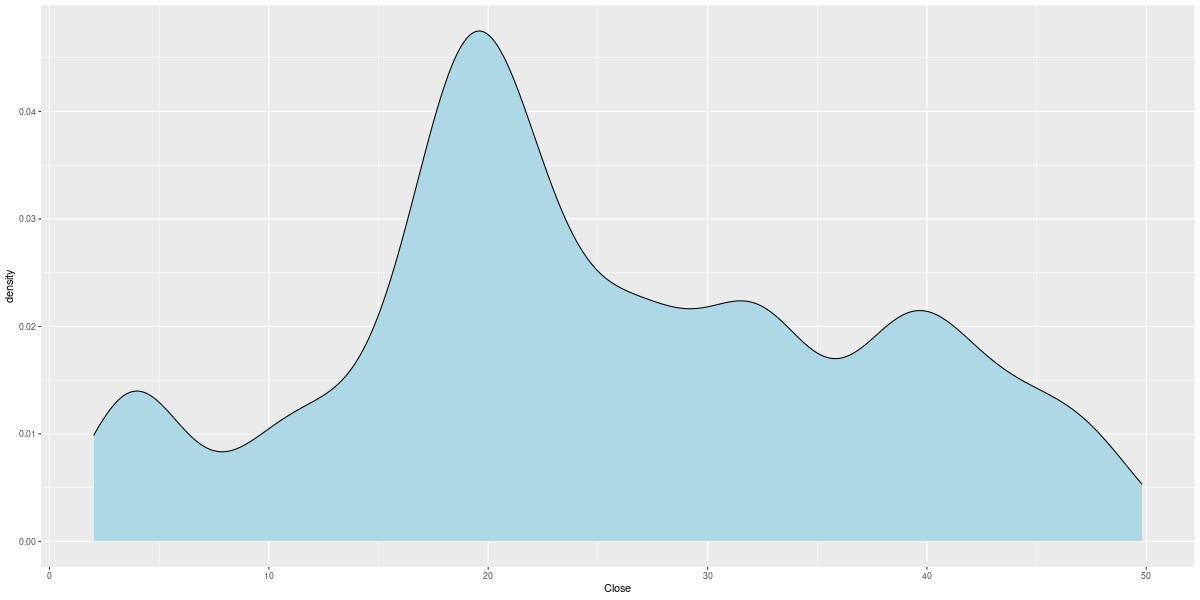

In [9]:
%%R -w 1200 -h 600
library(patchwork)
ggplot(df,aes(x=Close))+
  geom_density(fill="lightblue")

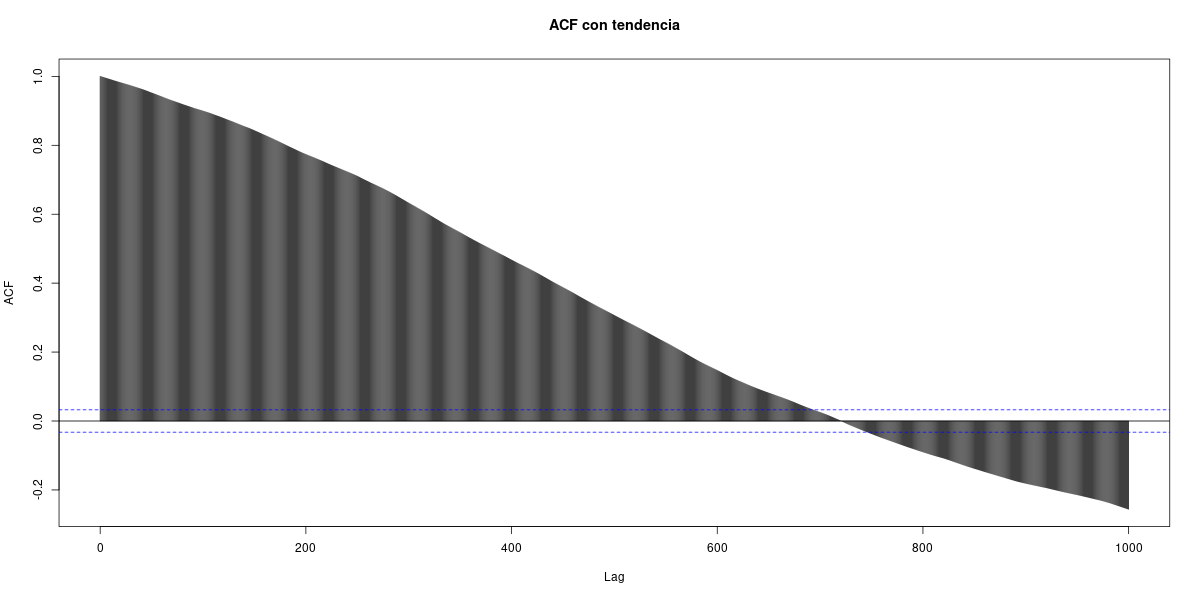

In [10]:
%%R  -w 1200 -h 600
acf(df$Close, lag.max = 1000, main = "ACF con tendencia")

In [11]:
%%R 

df

# A tsibble: 3,651 x 2 [1D]
   Date       Close
   <date>     <dbl>
 1 2000-01-03  21.9
 2 2000-01-04  20.9
 3 2000-01-05  21.1
 4 2000-01-06  21.2
 5 2000-01-07  21.4
 6 2000-01-08  21.4
 7 2000-01-09  21.4
 8 2000-01-10  21.4
 9 2000-01-11  21.4
10 2000-01-12  21.4
# ℹ 3,641 more rows
# ℹ Use `print(n = ...)` to see more rows


# 1

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Attaching package: ‘MASS’

The following object is masked from ‘package:patchwork’:

    area

The following object is masked from ‘package:dplyr’:

    select



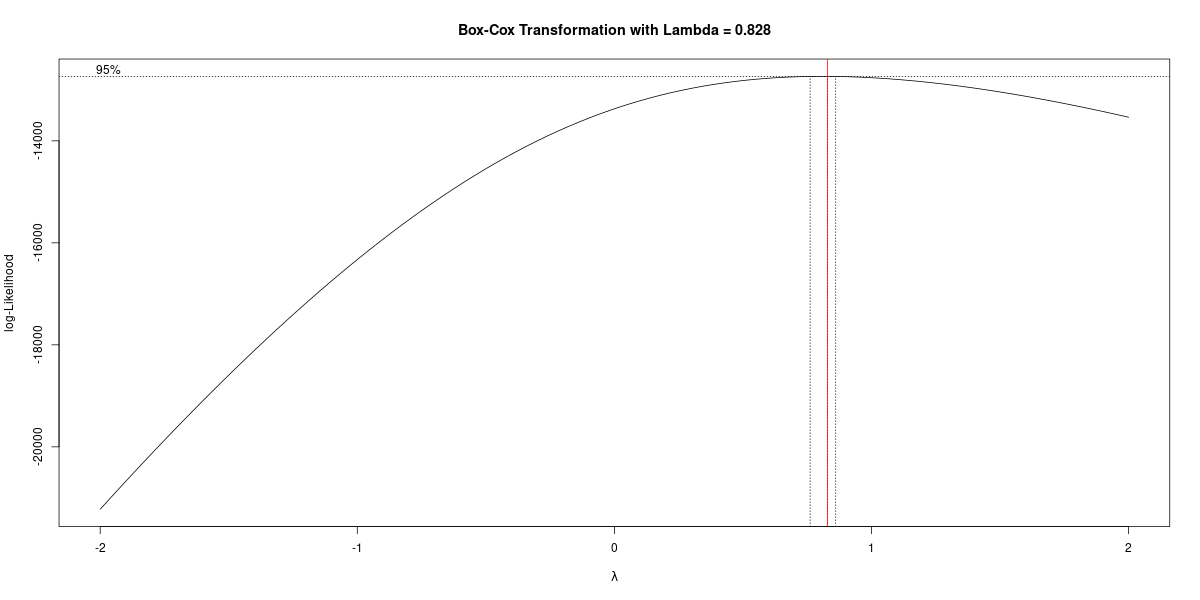

In [12]:
%%R -w 1200 -h 600

library(forecast)
library(MASS)

b <- boxcox(df$Close ~ 1)
lambda <- b$x[which.max(b$y)]

title(main = paste("Box-Cox Transformation with Lambda =", round(lambda, 3) ))
abline(v = lambda, col = "red")

In [13]:
from scipy.stats import boxcox

df_completo['BoxCox_Close'], lambda_value = boxcox(df_completo['Close']) 
print(lambda_value)
plot_(f'Estabilización de la Varianza (Box-cox λ ={lambda_value:.3f} )', (df_completo.index, df_completo["Close"], "Datos Originales"),
      (df_completo.index, df_completo["BoxCox_Close"], "BoxCox"))

0.809978741307756


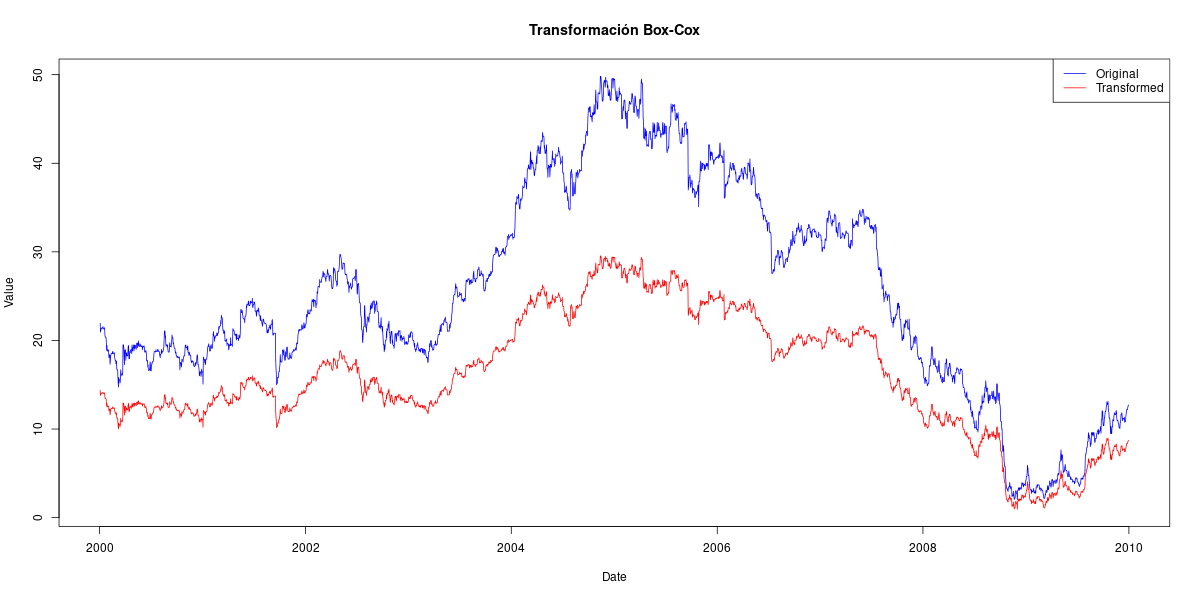

In [14]:
%%R -w 1200 -h 600

transformed_data <- forecast::BoxCox(df$Close, lambda = lambda)
plot(df$Date, df$Close, type = "l", col = "blue", ylim = range(c(df$Close, transformed_data)), 
     xlab = "Date", ylab = "Value", main = paste("Transformación Box-Cox"))
lines(df$Date, transformed_data, col = "red")
legend("topright", legend = c("Original", "Transformed"), col = c("blue", "red"), lty = 1)

# 2. Estimación de la tendencia

## 2.1 Loess

In [15]:
from statsmodels.nonparametric.smoothers_lowess import lowess


frac = 0.05  
smoothed_values = lowess(df_completo['BoxCox_Close'], df_completo.index, frac=frac, it=0)
trend_removed = df_completo['BoxCox_Close'] - smoothed_values[:, 1]

plot_('Eliminación de Tendencia por Lowees', (df_completo.index, df_completo["BoxCox_Close"], "BoxCox"),
      (df_completo.index, smoothed_values[:, 1], "Suavizado"),
      (df_completo.index, trend_removed, "Sin Tendencia"))
      

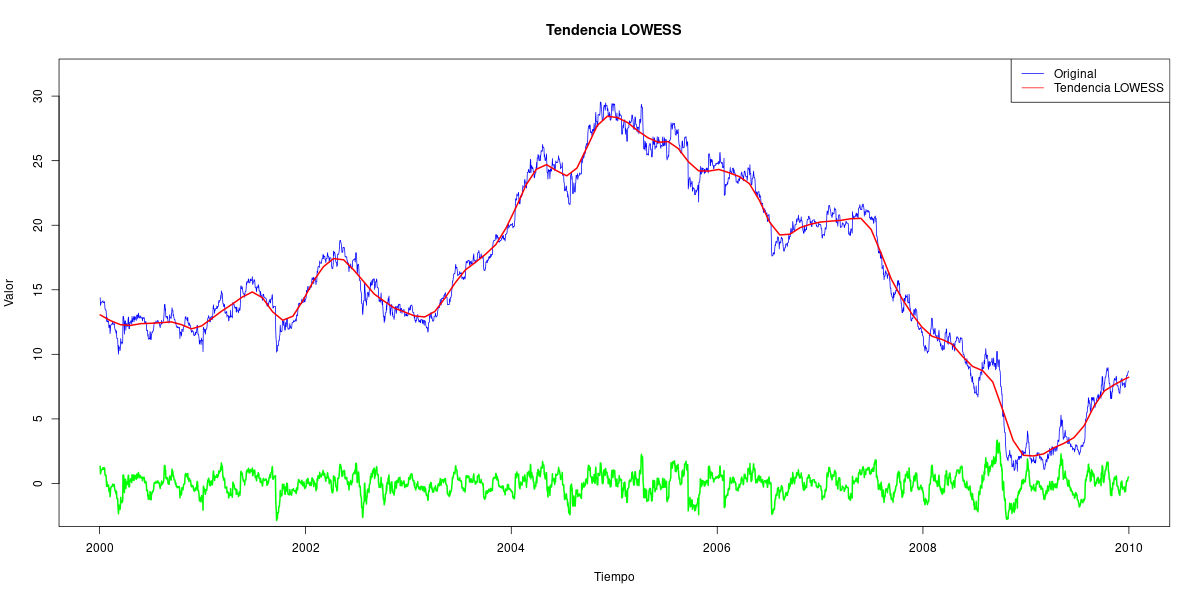

In [16]:
%%R -w 1200 -h 600

# Supongamos que tienes un dataframe df con una columna llamada 'Index'

# Calcular LOWESS
trend_lowess_R <- lowess(transformed_data,  f = 0.05, iter = 0)
trend_removed <- transformed_data - trend_lowess_R$y

# Crear un gráfico de la serie original y la tendencia LOWESS
plot(df$Date, transformed_data, type='l', col='blue', xlab='Tiempo', ylab='Valor', 
     main='Tendencia LOWESS', ylim=c(-2, max(transformed_data)+2))
lines(df$Date, trend_lowess_R$y, col='red', lwd=2)
lines(df$Date, trend_removed, col='green', lwd=2)
legend('topright', legend=c('Original', 'Tendencia LOWESS'), col=c('blue', 'red'), lty=1)



Attaching package: ‘astsa’

The following object is masked from ‘package:forecast’:

    gas



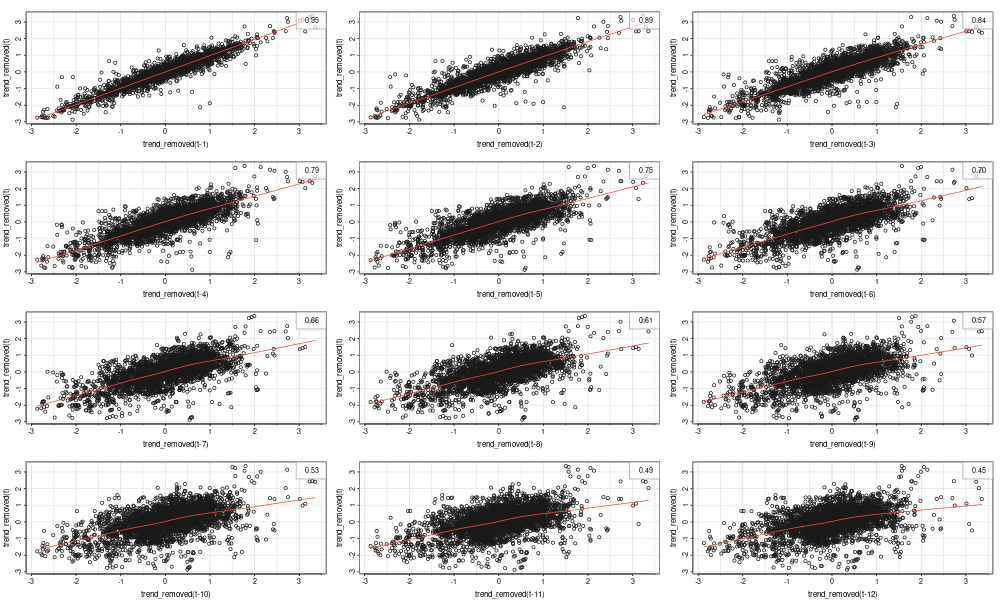

In [17]:
%%R -w 1000 -h 600
options(repr.plot.width=20, repr.plot.height=6)
library(astsa)
astsa::lag1.plot(trend_removed, 12)

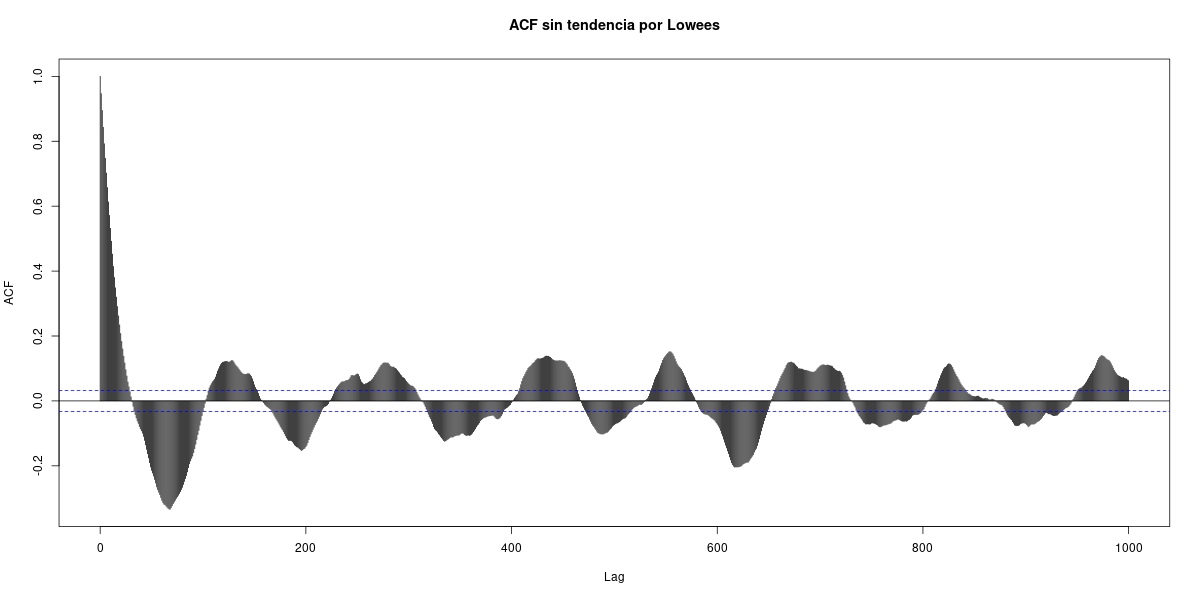

In [18]:
%%R -w 1200 -h 600

acf(trend_removed, lag.max = 1000, main = "ACF sin tendencia por Lowees")

$time.lag
 [1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
[51] 50

$mutual.information
 [1] 2.08356874 1.10546405 0.81600333 0.63497701 0.51813431 0.43635503
 [7] 0.37544671 0.32602121 0.27963197 0.24407718 0.21375973 0.18885575
[13] 0.17406881 0.16377607 0.15093661 0.13431017 0.11905295 0.11103116
[19] 0.10600712 0.09785594 0.09296995 0.09299585 0.08125523 0.07359221
[25] 0.07079827 0.07060564 0.06737744 0.07057559 0.07272332 0.06664193
[31] 0.06190714 0.06264173 0.06281381 0.06373615 0.06260337 0.06815274
[37] 0.06676340 0.06995075 0.07373835 0.07067595 0.07487893 0.08059800
[43] 0.07807929 0.08353159 0.08296117 0.08094970 0.08533817 0.08760485
[49] 0.08695407 0.09305504 0.09033848

$units
[1] "Nats"

$n.partitions
[1] 15

attr(,"class")
[1] "mutualInf"


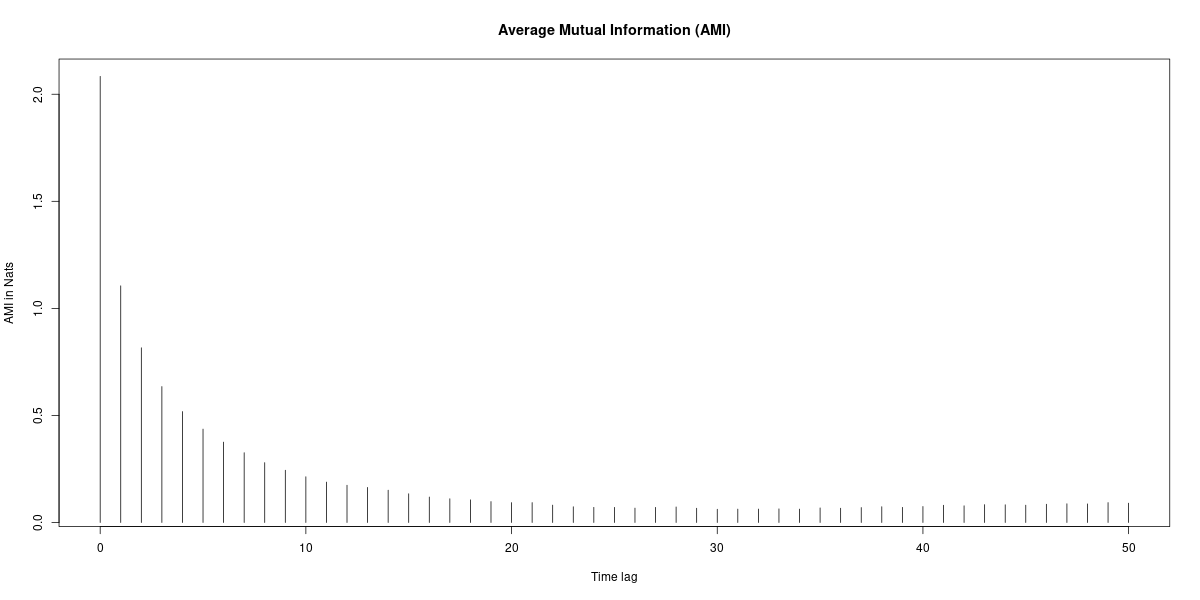

In [19]:
%%R -w 1200 -h 600
nonlinearTseries::mutualInformation(trend_removed,lag.max = 50, main="Información mutua")

## 2.2 Diferencia ordinaria



Apliquemos una diferencia ordinaria de orden 1 a la serie

$$
\nabla^1 Y_t=(1-B)^1 Y_t=Y_t-Y_{t-1}
$$

In [20]:
Close_diff = df_completo['BoxCox_Close'].diff()

plot_('Diferenciación de la Serie Temporal', (df_completo.index, df_completo["BoxCox_Close"], "BoxCox"),
      (df_completo.index, Close_diff, "Diferencia Ordinaria"))

In [21]:
%R -i Close_diff

In [22]:
%%R

Close_diff <- na.omit(Close_diff)

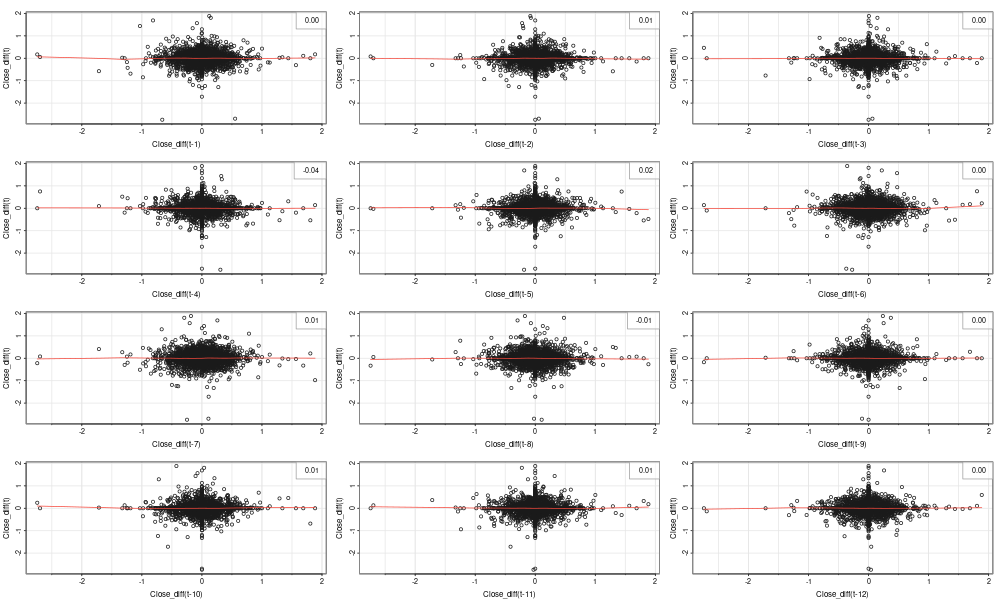

In [23]:
%%R -w 1000 -h 600
options(repr.plot.width=20, repr.plot.height=6)
library(astsa)
astsa::lag1.plot(Close_diff, 12)

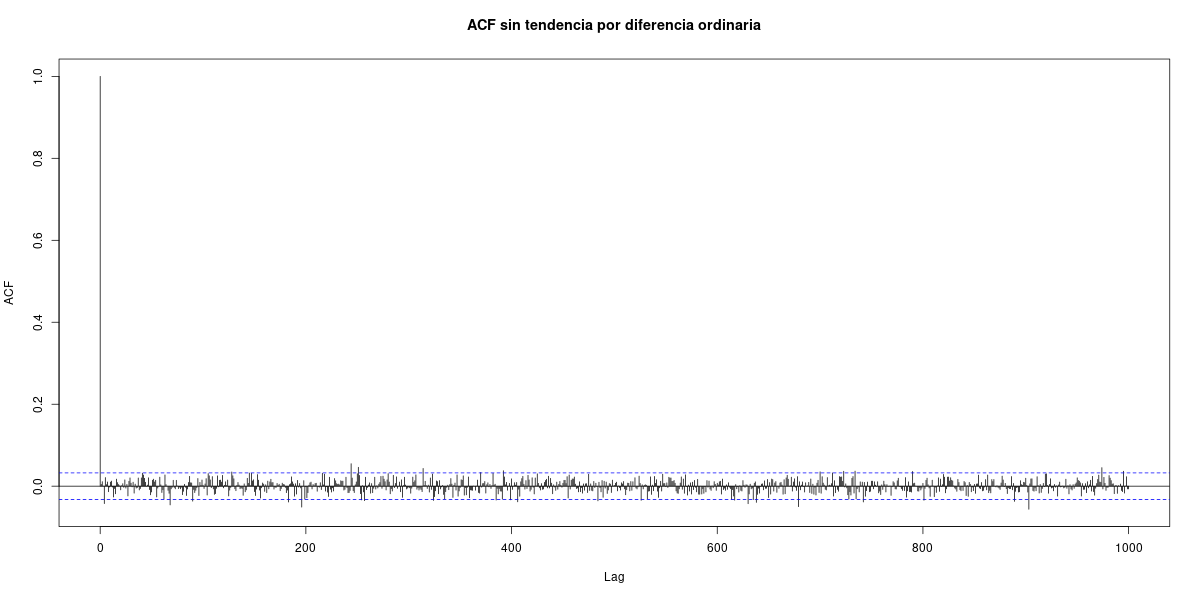

In [24]:
%%R -w 1200 -h 600

acf(Close_diff, lag.max = 1000, main = "ACF sin tendencia por diferencia ordinaria")

$time.lag
 [1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19

 20 21 22 23 24
[26] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
[51] 50

$mutual.information
 [1] 1.14218089 0.02175340 0.01468928 0.01562458 0.01839114 0.01691451
 [7] 0.01790505 0.05990039 0.01297552 0.01541495 0.01711615 0.01818979
[13] 0.01236344 0.02151468 0.05679676 0.01807884 0.01585098 0.01580736
[19] 0.01958676 0.01540459 0.01334834 0.05147114 0.01775354 0.01498095
[25] 0.01885186 0.01853078 0.01661502 0.01731175 0.04715032 0.01690150
[31] 0.01747021 0.01766919 0.01690003 0.01743826 0.01870695 0.05611722
[37] 0.01994689 0.01828810 0.02176537 0.02250940 0.01983600 0.02144932
[43] 0.05210094 0.01926632 0.01770268 0.02002451 0.02064409 0.01425370
[49] 0.02004527 0.04431153 0.01490978

$units
[1] "Nats"

$n.partitions
[1] 15

attr(,"class")
[1] "mutualInf"


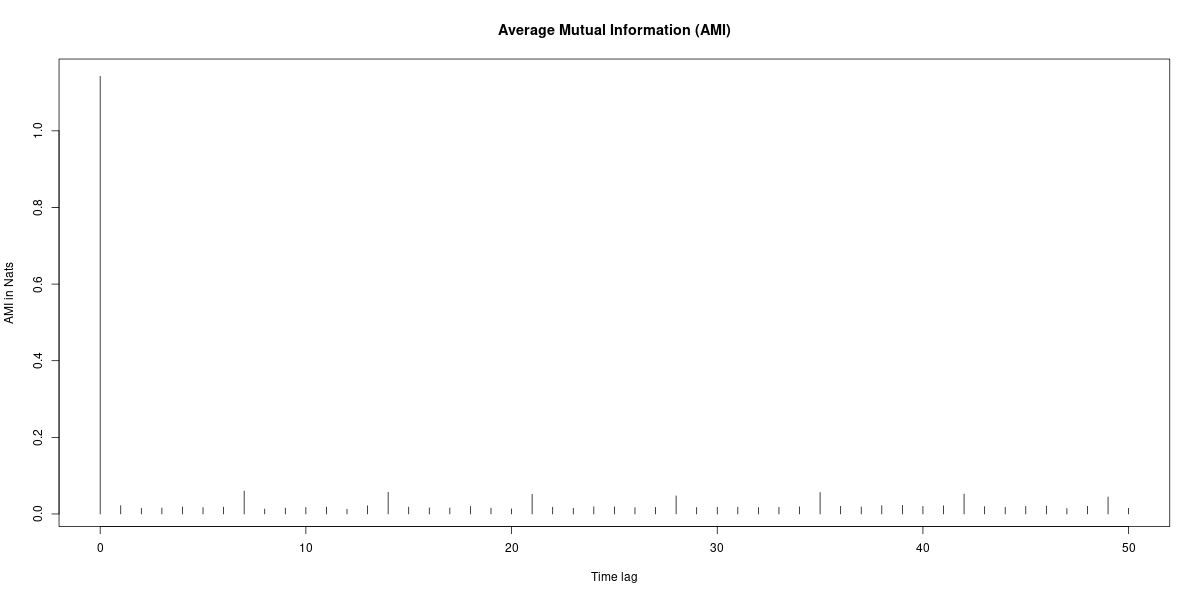

In [25]:
%%R -w 1200 -h 600
nonlinearTseries::mutualInformation(Close_diff,lag.max = 50, main="Información mutua de la diferencia ordinaria")

# 3

In [26]:
df_completo['Trend_Removed'] = trend_removed
df_completo.reset_index(inplace=True)

In [28]:
df_completo

,Date,Close,BoxCox_Close,Trend_Removed
0,2000-01-03,21.9375,13.826595,1.251290
1,2000-01-04,20.9375,13.268051,0.706693
2,2000-01-05,21.0625,13.338142,0.790602
3,2000-01-06,21.2500,13.443130,0.909277
4,2000-01-07,21.3750,13.513024,0.992726
...,...,...,...,...
3646,2009-12-27,12.1800,8.116821,0.175652
3647,2009-12-28,12.4100,8.259597,0.308804
3648,2009-12-29,12.6000,8.377165,0.416783
3649,2009-12-30,12.6600,8.414220,0.444283


In [34]:
import pandas as pd
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm

warnings.filterwarnings('ignore')

# Supongamos que df_completo es tu DataFrame con una columna 'y' de la serie temporal
# y un índice de fecha o período llamado 'date'.
# Asegúrate de que df_completo esté ordenado cronológicamente.

# Parámetros del rolling
window_size = 12  # Tamaño de la ventana para el rolling
train_size = len(df_completo) - window_size  # Tamaño del conjunto de entrenamiento

# Diccionario para almacenar los resultados
results = {
    "AAd": [],
    "AA": [],
    "AM": [],
    "AMd": []
}

# Función para entrenar y predecir usando ETS sin estacionalidad
def train_and_predict(df, error, trend, damped, seasonal=None):
    model = ETSModel(df['Close'], error=error, trend=trend, damped_trend=damped, seasonal=seasonal)
    fitted_model = model.fit(disp=False)  # disp=False elimina el verbose
    return fitted_model.forecast(steps=1), fitted_model

# Rolling window para cada modelo con barra de progreso
for i in tqdm(range(train_size), desc="Rolling ETS models"):
    train_data = df_completo.iloc[i:i+window_size]
    
    # AAd Model
    pred_AAd, fitted_AAd = train_and_predict(train_data, error='add', trend='add', damped=True)
    results["AAd"].append(pred_AAd.iloc[0])
    
    # AA Model
    pred_AA, fitted_AA = train_and_predict(train_data, error='add', trend='add', damped=False)
    results["AA"].append(pred_AA.iloc[0])
    
    # AM Model
    pred_AM, fitted_AM = train_and_predict(train_data, error='add', trend='mul', damped=False)
    results["AM"].append(pred_AM.iloc[0])
    
    # AMd Model
    pred_AMd, fitted_AMd = train_and_predict(train_data, error='add', trend='mul', damped=True)
    results["AMd"].append(pred_AMd.iloc[0])

# Convertir los resultados a un DataFrame
results_df = pd.DataFrame(results, index=df_completo.index[window_size:])



Rolling ETS models:   0%|          | 0/3639 [00:00<?, ?it/s]

Rolling ETS models: 100%|██████████| 3639/3639 [07:18<00:00,  8.30it/s]


KeyError: 'y'

In [36]:
results_df

,AAd,AA,AM,AMd
12,21.411380,21.416676,21.416825,21.411539
13,21.470447,21.517996,21.517775,21.470572
14,21.430099,21.435606,21.435421,21.430018
15,21.366002,21.362689,21.362708,21.366003
16,21.361766,21.359848,21.359871,21.361789
...,...,...,...,...
3646,12.241161,12.292576,12.329644,12.276868
3647,12.423551,12.473034,12.507406,12.457628
3648,12.585062,12.727727,12.759614,12.578169
3649,12.639387,12.875303,12.903088,12.631772


MSE for AAd: 0.4251
MSE for AA: 0.4759
MSE for AM: 0.4967
MSE for AMd: 0.5031


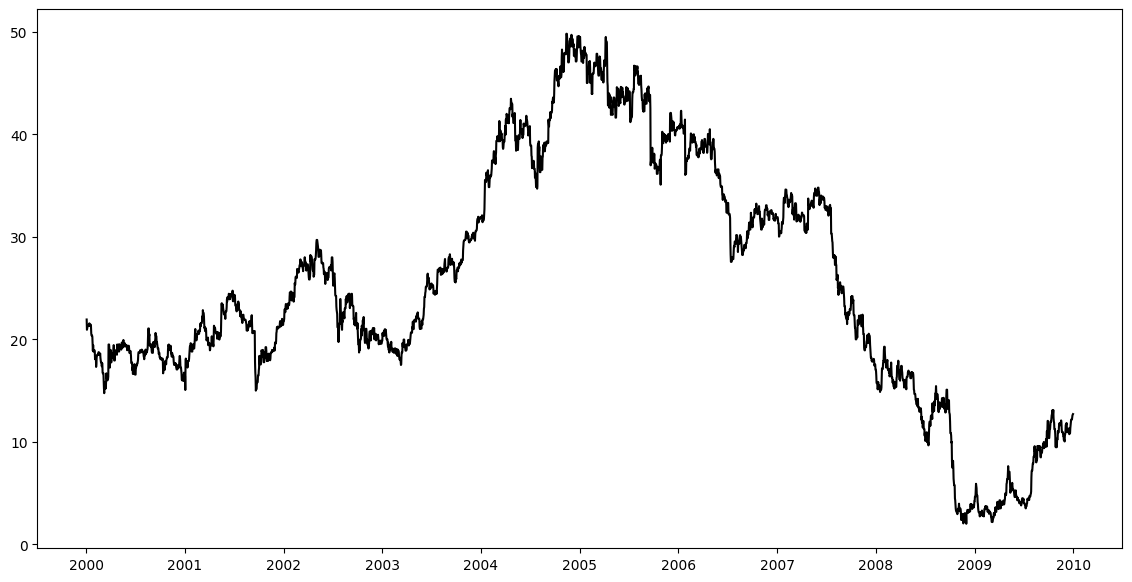

In [37]:

# Cálculo del error de predicción (opcional)
for model_name in results_df.columns:
    mse = mean_squared_error(df_completo['Close'].iloc[window_size:], results_df[model_name])
    print(f"MSE for {model_name}: {mse:.4f}")

# Gráfico de las predicciones
plt.figure(figsize=(14, 7))
plt.plot(df_completo['Date'], df_completo['Close'], label='Close', color='black')
plot_(f'Predicciones ETS', (results_df.index, results_df['AAd'], 'AAd'),
      (results_df.index, results_df['AA'], 'AA'),
      (results_df.index, results_df['AM'], 'AM'),
      (results_df.index, results_df['AMd'], 'AMd'))